<a href="https://colab.research.google.com/github/BaskaranV15/convolutional-denoising-autoencoder/blob/main/ex6_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras import models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_train_scaled = x_train.astype('float32') / 255.
x_test_scaled = x_test.astype('float32') / 255.
x_train_scaled = np.reshape(x_train_scaled, (len(x_train_scaled), 28, 28, 1))
x_test_scaled = np.reshape(x_test_scaled, (len(x_test_scaled), 28, 28, 1))

In [5]:
noise_factor = 0.5
x_train_noisy = x_train_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train_scaled.shape)
x_test_noisy = x_test_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test_scaled.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

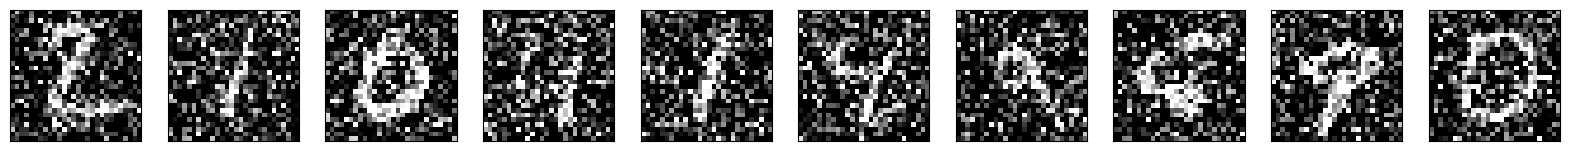

In [6]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [7]:
inp_img=keras.Input(shape=(28,28,1))
x=layers.Conv2D(16,(3,3),activation='relu',padding='same')(inp_img)
x=layers.MaxPooling2D((2,2),padding='same')(x)
x=layers.Conv2D(8,(3,3),activation='relu',padding='same')(x)
x=layers.MaxPooling2D((2,2),padding='same')(x)
x=layers.Conv2D(8,(3,3),activation='relu',padding='same')(x)
encoder=layers.MaxPooling2D((2,2),padding='same')(x)
x=layers.Conv2D(8,(3,3),activation='relu',padding='same')(encoder)
x=layers.UpSampling2D((2,2))(x)
x=layers.Conv2D(8,(3,3),activation='relu',padding='same')(x)
x=layers.UpSampling2D((2,2))(x)
x=layers.Conv2D(16,(3,3),activation='relu')(x)
x=layers.UpSampling2D((2,2))(x)
decoder=layers.Conv2D(1,(3,3),activation='sigmoid',padding='same')(x)
model=keras.Model(inp_img,decoder)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 8)           │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 8, 8, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 16, 16, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 14, 14, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_2 (UpSampling2D)       │ (None, 28, 28, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 1)           │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(x_train_noisy,x_train_scaled,epochs=50,batch_size=128,shuffle=True,validation_data=(x_test_noisy,x_test_scaled))

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 75s 154ms/step - loss: 0.3592 - val_loss: 0.1870
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 66s 140ms/step - loss: 0.1804 - val_loss: 0.1640
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 65s 138ms/step - loss: 0.1629 - val_loss: 0.1553
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 65s 140ms/step - loss: 0.1552 - val_loss: 0.1501
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 72s 154ms/step - loss: 0.1501 - val_loss: 0.1457
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 76s 142ms/step - loss: 0.1464 - val_loss: 0.1429
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 141ms/step - loss: 0.1435 - val_loss: 0.1398
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 141ms/step - loss: 0.1410 - val_loss: 0.1376
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 141ms/step - loss: 0.1387 - val_loss: 0.1360
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 142ms/step - loss: 0.1370 - val_loss: 0.1341
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 66s 141ms/step - loss: 0.1353 - val_loss: 0.1329
Epoch 12/50
469/469

Text(0.5, 1.0, 'Training Loss vs. Validation Loss\n BASKARAN V(212222230020)')

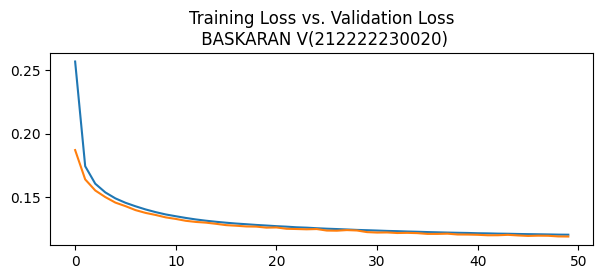

In [13]:
import pandas as pd
metrics=pd.DataFrame(model.history.history)
plt.figure(figsize=(7,2.5))
plt.plot(metrics['loss'], label='Training Loss')
plt.plot(metrics['val_loss'], label='Validation Loss')
plt.title('Training Loss vs. Validation Loss\n BASKARAN V(212222230020)')

In [14]:
decodeimg=model.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step


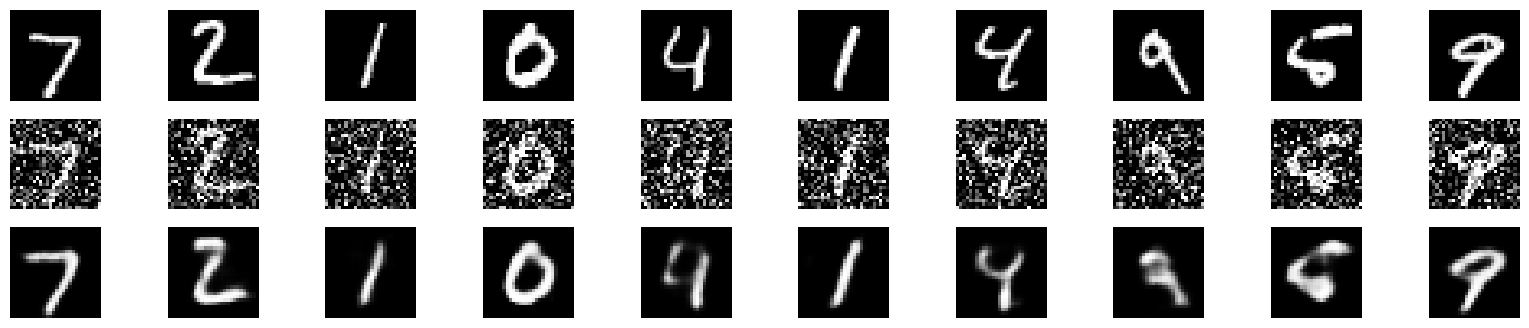

In [15]:
def display_images(x_test_scaled, x_test_noisy, decodeimg, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        for j, img in enumerate([x_test_noisy,x_test_scaled,decodeimg]):
            ax = plt.subplot(3, n, i + 1 + j * n)
            plt.imshow(img[i].reshape(28, 28), cmap='gray')
            ax.axis('off')
    plt.show()
display_images(x_test_noisy,x_test_scaled, decodeimg)